In [24]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("user_events_large.csv")
df["event_time"] = pd.to_datetime(df["event_time"])

df = df.sort_values("event_time").reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     1500 non-null   int64         
 1   event_type  1500 non-null   object        
 2   event_time  1500 non-null   datetime64[ns]
 3   device      1500 non-null   object        
 4   city        1500 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 58.7+ KB


In [26]:
df.head()   

,user_id,event_type,event_time,device,city
0,62,message_sent,2024-11-01 00:18:08,android,Isfahan
1,21,message_sent,2024-11-01 00:20:15,android,Shiraz
2,59,message_sent,2024-11-01 00:25:41,android,Shiraz
3,23,message_sent,2024-11-01 01:30:27,android,Tabriz
4,72,message_sent,2024-11-01 02:36:40,ios,Tehran


In [27]:
df.tail()

,user_id,event_type,event_time,device,city
1495,34,message_sent,2024-11-15 23:00:43,ios,Mashhad
1496,36,message_sent,2024-11-15 23:03:23,android,Tabriz
1497,17,message_sent,2024-11-15 23:24:14,ios,Mashhad
1498,35,message_sent,2024-11-15 23:28:20,android,Tehran
1499,88,message_sent,2024-11-15 23:55:45,android,Isfahan


In [28]:
df["hour"] = df["event_time"].dt.hour
df["date"] = df["event_time"].dt.date
df["day_name"] = df["event_time"].dt.day_name()


In [29]:
total_events = len(df)
print(total_events)

1500


In [30]:
unique_users = df["user_id"].nunique()
print(unique_users)


100


In [31]:
user_activity = df.groupby("user_id").size()
active_users = user_activity[user_activity >= 10]
active_user_ratio = len(active_users) / unique_users

print(f"Unique users: {unique_users}")
print(f"Active users: {len(active_users)}")
print(f"Active user ratio: {active_user_ratio:.2%}")

Unique users: 100
Active users: 92
Active user ratio: 92.00%


In [32]:
active_user_ids = active_users.index
active_events = df[df["user_id"].isin(active_user_ids)]

activity_concentration = len(active_events) / total_events
print(f"Activity concentration among active users: {activity_concentration:.2%}")

Activity concentration among active users: 95.80%


In [33]:
hourly_activity = df.groupby("hour").size()
daily_activity = df.groupby("date").size()
device_activity = df.groupby("device").size()
city_activity = df.groupby("city").size()     

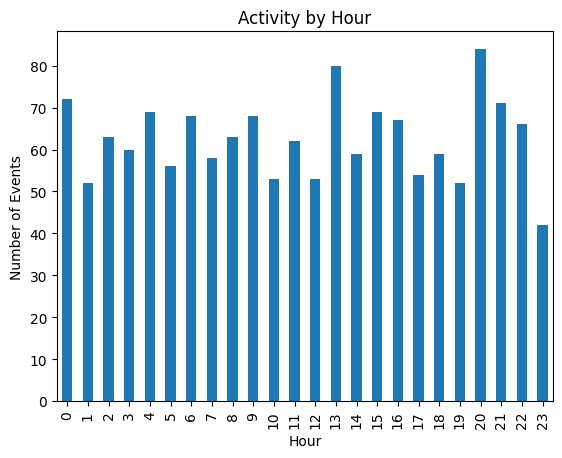

In [34]:
hourly_activity.plot(kind="bar")
plt.title("Activity by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Events")
plt.show()

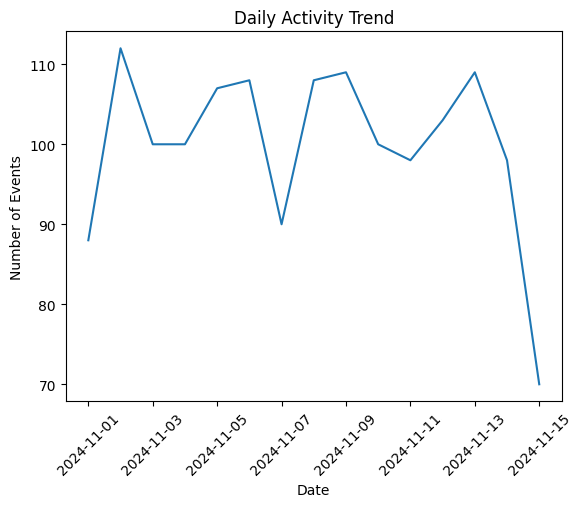

In [35]:
daily_activity.plot(kind="line")
plt.title("Daily Activity Trend")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()


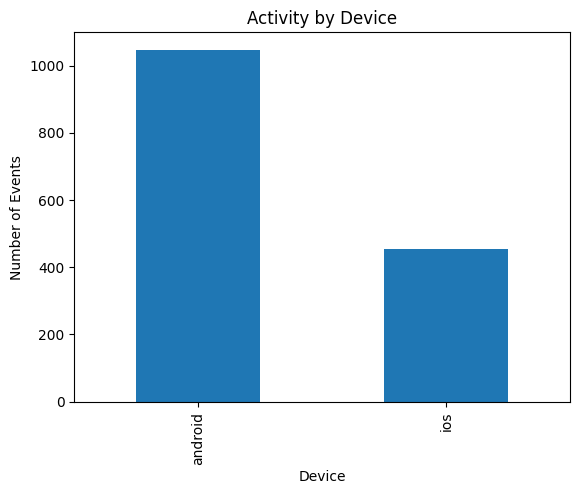

In [36]:
device_activity.plot(kind="bar")
plt.title("Activity by Device")
plt.xlabel("Device")
plt.ylabel("Number of Events")
plt.show()


In [37]:
print("Total Events:", total_events)
print("Unique Users:", unique_users)
print("Active User Ratio:", active_user_ratio)
print("Activity Concentration:", activity_concentration)

print("\nDevice Activity:")
print(device_activity)

print("\nCity Activity:")
print(city_activity)

print("\nPeak Hour:")
print(hourly_activity.idxmax())


Total Events: 1500
Unique Users: 100
Active User Ratio: 0.92
Activity Concentration: 0.958

Device Activity:
device
android    1047
ios         453
dtype: int64

City Activity:
city
Isfahan    306
Mashhad    285
Shiraz     325
Tabriz     304
Tehran     280
dtype: int64

Peak Hour:
20


In [38]:
df.groupby("device")["user_id"].nunique()


device
android    100
ios        100
Name: user_id, dtype: int64

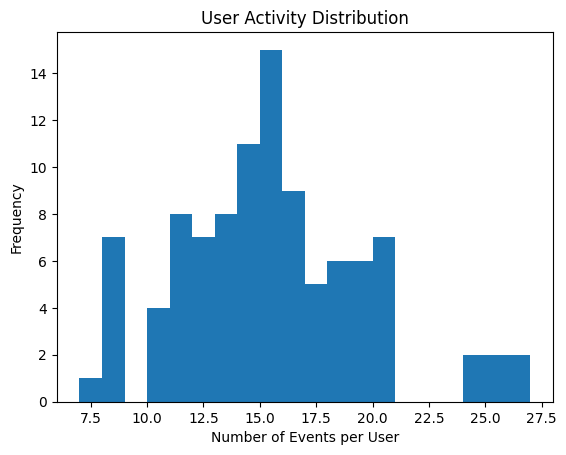

In [39]:
user_activity.plot(kind="hist", bins=20)
plt.title("User Activity Distribution")
plt.xlabel("Number of Events per User")
plt.ylabel("Frequency")
plt.show()

In [40]:
# تعداد روزهای فعال هر کاربر
user_active_days = df.groupby("user_id")["date"].nunique()

print(user_active_days.head())


user_id
1    12
2    12
3    11
4    13
5    10
Name: date, dtype: int64


In [41]:
avg_active_days = user_active_days.mean()
print("Average active days per user:", avg_active_days)


Average active days per user: 9.2


In [42]:
active_days_distribution = user_active_days.value_counts().sort_index()

print(active_days_distribution)


date
5      1
6      8
7     11
8     12
9     20
10    25
11    14
12     7
13     2
Name: count, dtype: int64


In [43]:
retained_users = user_active_days[user_active_days > 1]
retention_rate = len(retained_users) / unique_users

print("Retention Rate:", retention_rate)


Retention Rate: 1.0


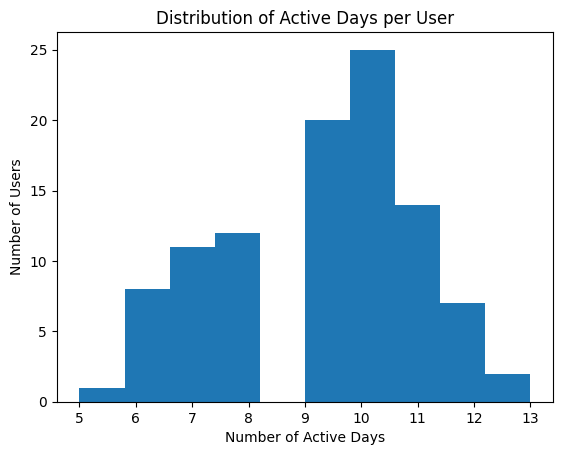

In [44]:
import matplotlib.pyplot as plt

user_active_days.plot(kind="hist", bins=10)
plt.title("Distribution of Active Days per User")
plt.xlabel("Number of Active Days")
plt.ylabel("Number of Users")
plt.show()


In [ ]:
git config --global user.name "Nima Haghighi"
git config --global user.email "Nimahaghighiwork@gmail.com"
